<h1><center> Math761 - HW 7 <br>
   Bootstrap, Jackknife, and EM</center> </h1>
   


### Exercise 1

Consider the `scor` data from the `bootstrap` package. It gives the test scores for 88 students in five subjects: mechanics, vectors, algebra, analysis, and statistics. 

In [1]:
data("scor", package="bootstrap")
print(scor)

   mec vec alg ana sta
1   77  82  67  67  81
2   63  78  80  70  81
3   75  73  71  66  81
4   55  72  63  70  68
5   63  63  65  70  63
6   53  61  72  64  73
7   51  67  65  65  68
8   59  70  68  62  56
9   62  60  58  62  70
10  64  72  60  62  45
11  52  64  60  63  54
12  55  67  59  62  44
13  50  50  64  55  63
14  65  63  58  56  37
15  31  55  60  57  73
16  60  64  56  54  40
17  44  69  53  53  53
18  42  69  61  55  45
19  62  46  61  57  45
20  31  49  62  63  62
21  44  61  52  62  46
22  49  41  61  49  64
23  12  58  61  63  67
24  49  53  49  62  47
25  54  49  56  47  53
26  54  53  46  59  44
27  44  56  55  61  36
28  18  44  50  57  81
29  46  52  65  50  35
30  32  45  49  57  64
31  30  69  50  52  45
32  46  49  53  59  37
33  40  27  54  61  61
34  31  42  48  54  68
35  36  59  51  45  51
36  56  40  56  54  35
37  46  56  57  49  32
38  45  42  55  56  40
39  42  60  54  49  33
40  40  63  53  54  25
41  23  55  59  53  44
42  48  48  49  51  37
43  41  63 

#### a) Because mechanics and vectors were closed book tests while the other three subjects were open book tests, it can be interesting to look at the correlation between mechanics and vectors versus the correlation between analysis and statistics versus the corrleation between mechanics and statistics. Report these three correlations and then find the bootstrap estimates of the standard error and bias of the sample correlations. Use 2000 bootstrap replications for each. Then please combine these results in a table. Also make  histograms of the bootstrapped correlations (3, one for each correlation). 

**Solution**

The point estimates of the correlations are reported in the first row of the table, with ana_sta correlation the largest at 0.607, followed by mec_vec at 0.553, then the mec_sta has the lowest correlation at 0.389. The subjects that both have the same policy (open or closed book) have stronger correlations than those that have different test-taking policies. The results from the bootstrap estimates are in the table below. The mec_sta correlation has the largest standard error and the largest bias.


In [2]:
mec_vec = c(cor(scor$mec, scor$vec)) # original corr
ana_sta = c(cor(scor$ana, scor$sta))
mec_sta = c(cor(scor$mec, scor$sta))

# boot strap estimates
B = 2000
boot_means_mec_vec = rep(NA, B)
boot_means_ana_sta = rep(NA, B)
boot_means_mec_sta = rep(NA, B)
inds = seq(1,nrow(scor))
for (b in 1:B){
    boot = sample(inds, size=nrow(scor), replace=TRUE)
    boot_df = scor[boot, ]
    boot_means_mec_vec[b] = cor(boot_df$mec, boot_df$vec)
    boot_means_ana_sta[b] = cor(boot_df$ana, boot_df$sta)
    boot_means_mec_sta[b] = cor(boot_df$mec, boot_df$sta)
}
# store mean, std error, bias
mec_vec[2] = mean(boot_means_mec_vec)
mec_vec[3] = sd(boot_means_mec_vec)
mec_vec[4] = mec_vec[2] - mec_vec[1] # theta boot - theta hat
ana_sta[2] = mean(boot_means_ana_sta)
ana_sta[3] = sd(boot_means_ana_sta)
ana_sta[4] = ana_sta[2] - ana_sta[1] 
mec_sta[2] = mean(boot_means_mec_sta)
mec_sta[3] = sd(boot_means_mec_sta)
mec_sta[4] = mec_sta[2] - mec_sta[1] 

est = round(data.frame(mec_vec, ana_sta, mec_sta, row.names = c("theta hat", "theta boot", "boot se est", "boot bias est")),3)
print(est)

              mec_vec ana_sta mec_sta
theta hat       0.553   0.607   0.389
theta boot      0.549   0.602   0.383
boot se est     0.078   0.068   0.110
boot bias est  -0.004  -0.005  -0.007


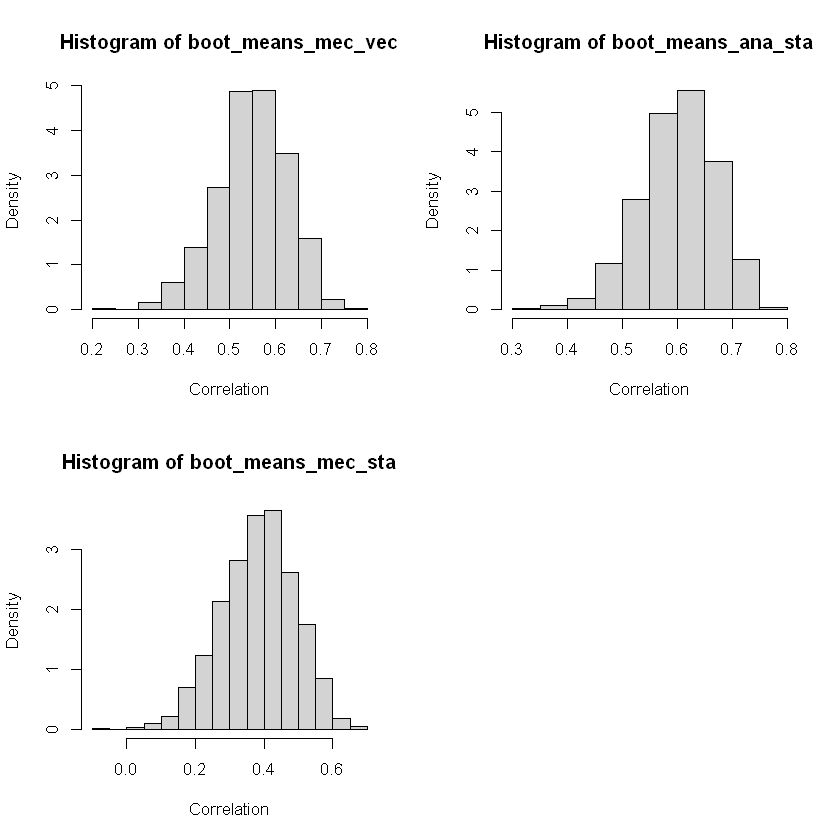

In [9]:
# plot histograms
par(mfrow = c(2,2))
hist(boot_means_mec_vec, freq=FALSE, xlab="Correlation", ylab="Density")
hist(boot_means_ana_sta, freq=FALSE, xlab="Correlation", ylab="Density")
hist(boot_means_mec_sta, freq=FALSE, xlab="Correlation", ylab="Density")


#### b) Also report the jackknife estimates of the bias and standard error for the sample correlations (between mechanics and vectors; between analysis and statistics; and between mechanics and statistics). Please put these in a table as well and make histograms!

**Solution**

The results from the jackknife estimates are in the table below. The mec_sta correlation has the largest standard error, although the mec_vec correlation has the largest bias.


In [16]:
mec_vec = c(cor(scor$mec, scor$vec)) # original corr
ana_sta = c(cor(scor$ana, scor$sta))
mec_sta = c(cor(scor$mec, scor$sta))

# boot strap estimates
j = nrow(scor)
jack_means_mec_vec = rep(NA, j)
jack_means_ana_sta = rep(NA, j)
jack_means_mec_sta = rep(NA, j)

for (i in 1:j){
    boot = sample(inds, size=nrow(scor), replace=TRUE)
    jack_df = scor[-c(i), ]
    jack_means_mec_vec[i] = cor(jack_df$mec, jack_df$vec)
    jack_means_ana_sta[i] = cor(jack_df$ana, jack_df$sta)
    jack_means_mec_sta[i] = cor(jack_df$mec, jack_df$sta)
}
# store mean, std error, bias
mec_vec[2] = mean(jack_means_mec_vec)
mec_vec[3] = sqrt((j-1)*(mean((jack_means_mec_vec-mec_vec[2])^2)))
mec_vec[4] = (j-1)*(mec_vec[2] - mec_vec[1]) # (n-1)*(mean(theta.jack)-theta_hat)
ana_sta[2] = mean(jack_means_ana_sta)
ana_sta[3] = sqrt((j-1)*(mean((jack_means_ana_sta-ana_sta[2])^2)))
ana_sta[4] = (j-1)*(ana_sta[2] - ana_sta[1] )
mec_sta[2] = mean(jack_means_mec_sta)
mec_sta[3] = sqrt((j-1)*(mean((jack_means_mec_sta-mec_sta[2])^2)))
mec_sta[4] = (j-1)*(mec_sta[2] - mec_sta[1] )

est = round(data.frame(mec_vec, ana_sta, mec_sta, row.names = c("theta hat", "theta jack", "jack se est", "jack bias est")),3)
print(est)

              mec_vec ana_sta mec_sta
theta hat       0.553   0.607   0.389
theta jack      0.553   0.607   0.389
jack se est     0.078   0.069   0.110
jack bias est  -0.005  -0.001  -0.003


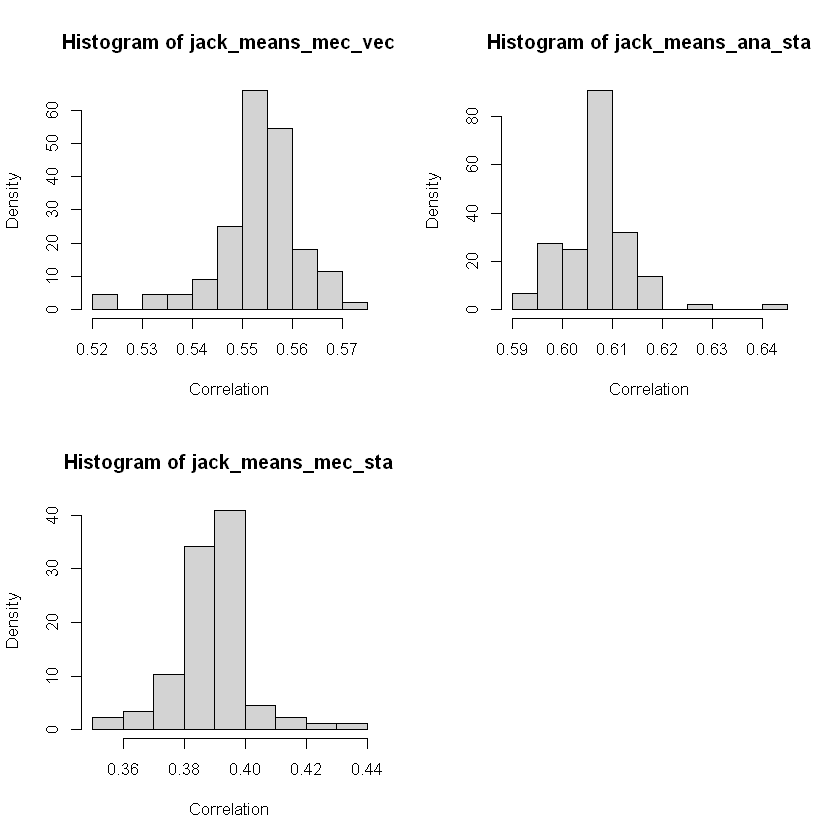

In [17]:
# plot histograms
par(mfrow = c(2,2))
hist(jack_means_mec_vec, probability=TRUE, xlab="Correlation", ylab="Density")
hist(jack_means_ana_sta, probability=TRUE,  xlab="Correlation", ylab="Density")
hist(jack_means_mec_sta, probability=TRUE,  xlab="Correlation", ylab="Density")

#### c) Are any of the biases considered serious enough to adjust for? Explain why or why not.

**Solution**

A bias is considered serious enough to adjust for if $|bias|/SE>2.5$. The value for these estimators is in the table below. From the table, it is clear that all values are less than 2.5, with the highest value coming from the boot strapped ana_sta with a score of 0.075. Hence, none of the biases are serious enough to adjust for.

In [20]:
mec_vec = c() # original corr
ana_sta = c()
mec_sta = c()

# for boot
mec_vec[1] = abs(mean(boot_means_mec_vec)-cor(scor$mec, scor$vec))/sd(boot_means_mec_vec)
ana_sta[1] = abs(mean(boot_means_ana_sta)-cor(scor$ana, scor$sta))/sd(boot_means_ana_sta)
mec_sta[1] = abs(mean(boot_means_mec_sta)-cor(scor$mec, scor$sta))/sd(boot_means_mec_sta)
# for jack knife
mec_vec[2] = abs((j-1)*(mean(jack_means_mec_vec)-cor(scor$mec, scor$vec)))/sqrt((j-1)*(mean((jack_means_mec_vec-mean(jack_means_mec_vec))^2)))
ana_sta[2] = abs((j-1)*(mean(jack_means_ana_sta)-cor(scor$ana, scor$sta)))/sqrt((j-1)*(mean((jack_means_ana_sta-mean(jack_means_ana_sta))^2)))
mec_sta[2] = abs((j-1)*(mean(jack_means_mec_sta)-cor(scor$mec, scor$sta)))/sqrt((j-1)*(mean((jack_means_mec_sta-mean(jack_means_mec_sta))^2)))


est = round(data.frame(mec_vec, ana_sta, mec_sta, row.names = c("boot", "jack")),3)
print(est)

     mec_vec ana_sta mec_sta
boot   0.053   0.075   0.060
jack   0.065   0.021   0.031


### Exercise 2

In principle component analysis,

$$
\theta = \frac{\lambda_1}{\sum_{j=1}^{5}\lambda_j}
$$

represents the amount of variance explained by the largest eigenvector (to which this eigenvalue corresponds), which you can get by eigenvalue decomposition of the correlation matrix $\Sigma$. The eigenvector corresponding to the largest eigenvalue gives you the direction in which the data varies most!

For the data in `scor`, you can estimate $\theta$ using

$$
\hat{\theta} = \frac{\hat{\lambda_1}}{\sum_{j=1}^{5}\hat{\lambda_j}}
$$

by 

1. Calculate sample correlation $\hat{\Sigma}$
2. Use eigenvalue decomposition to get $\hat{\lambda_i}$ for i = 1, ..., 5
3. Let the largest $\hat{\lambda_i}$ be $\hat{\lambda_1}$
4. Compute $\hat{\theta}$ from your obtained values


#### a) Compute the se and bias of this estimator using 2000 bootstrap estimates. Put the results in a table please and draw a histogram of the bootstrapped esitmates!

**Solution**

The results are in the table and figure below, with the original estimate on the whole data of 0.636, the boot strap estimate of 0.635, the standard error estimate of 0.044, and bias estimate of -0.002.


  original   est est_se est_bias
1    0.636 0.635  0.044   -0.002


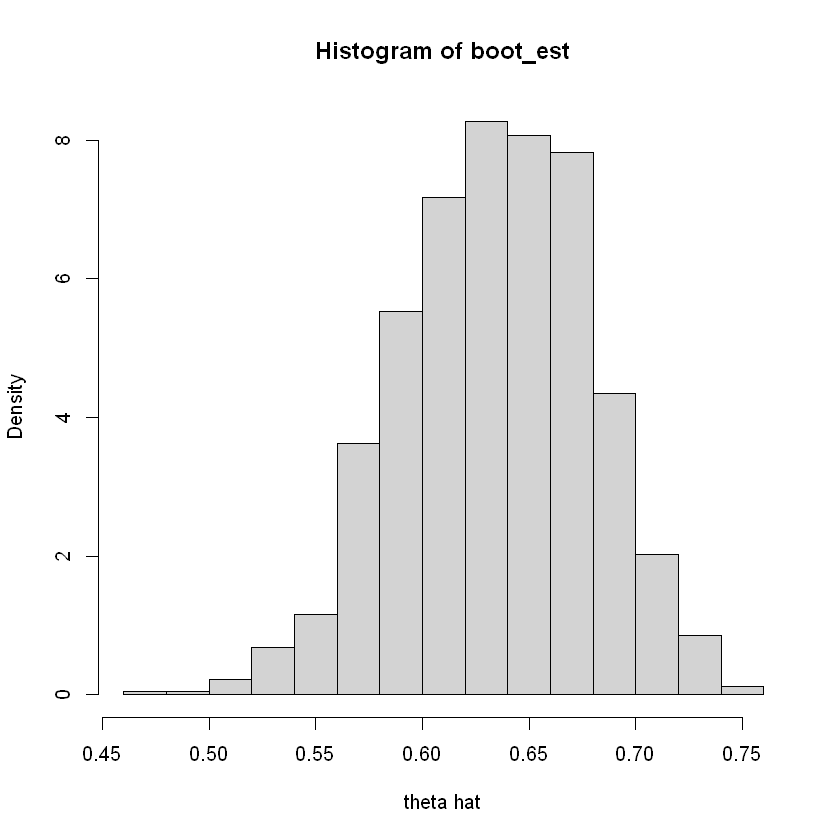

In [32]:

# calculate sample correlation matrix
corr_mat = cor(scor)
# get eigen values
ev = eigen(corr_mat, symmetric=FALSE)
theta_hat = ev$"values"[1]/sum(ev$"values")

original = theta_hat

B = 2000
boot_est = rep(NA, B)
inds = seq(1,nrow(scor))
for (b in 1:B){
    boot = sample(inds, size=nrow(scor), replace=TRUE)
    boot_df = scor[boot, ]
    # calculate sample correlation matrix
    corr_mat = cor(boot_df)
    # get eigen values
    ev = eigen(corr_mat, symmetric=FALSE)
    # calculate theta hat
    boot_est[b] = ev$"values"[1]/sum(ev$"values")
}

est = mean(boot_est)
est_se = sd(boot_est)
est_bias = est-theta_hat

res = round(data.frame(original, est, est_se, est_bias),3)
print(res)

hist(boot_est, xlab="theta hat", probability=TRUE)


#### b) Compute the se and bias of this estimator using the jackknife estimates. Put the results in a table please and draw a histogram of the jackknifed estimates!

**Solution**

The results are in the table and figure below, with the original estimate on the whole data of 0.636, jackknife estimate of 0.636, the standard error estimate of 0.045, and bias estimate of 0.

  original   est est_se est_bias
1    0.636 0.636  0.045        0


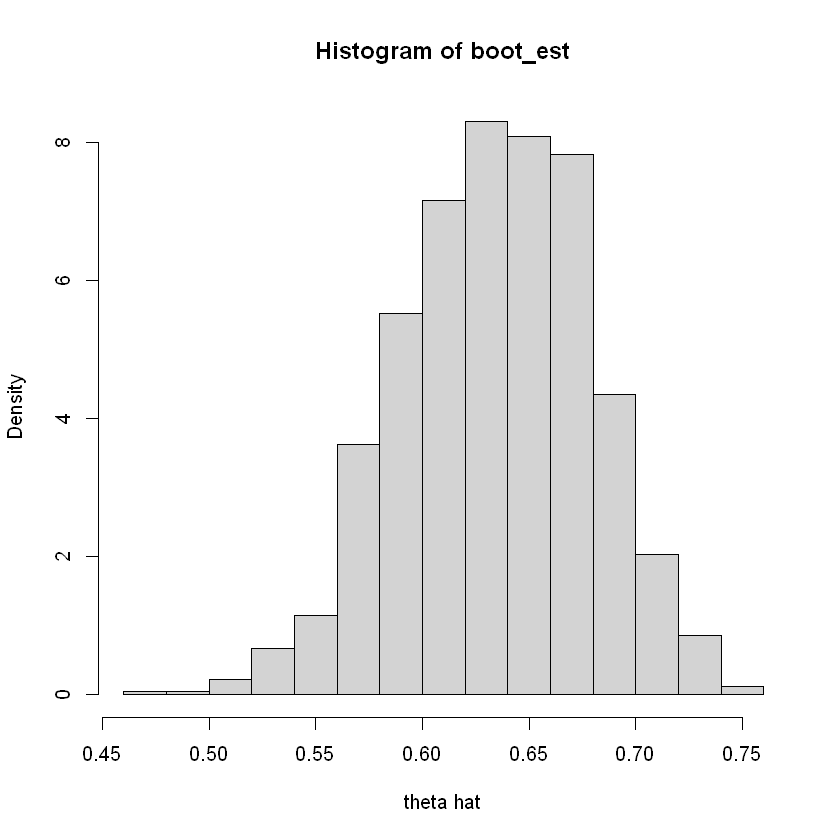

In [36]:
j = nrow(scor)
jack_est = rep(NA, j)
for (i in 1:j){
    jack_df = scor[-c(i), ]
    # calculate sample correlation matrix
    corr_mat = cor(jack_df)
    # get eigen values
    ev = eigen(corr_mat, symmetric=FALSE)
    # calculate theta hat
    jack_est[i] = ev$"values"[1]/sum(ev$"values")
}

est = mean(jack_est)
est_se = sqrt((j-1)*(mean((jack_est-mean(jack_est))^2)))
est_bias = (j-1)*(est-theta_hat)

res = round(data.frame(original, est, est_se, est_bias),3)
print(res)

hist(boot_est, xlab="theta hat", probability=TRUE)


#### c) Are any of the biases considered serious enough to adjust for? Explain why or why not

**Solution**

Similar to question 1, bias is considered serious enough to adjust for if $|bias|/SE>2.5$. The value for these estimators is in the table below. From the table, it is clear that all values are less than 2.5, with the highest value coming from the boot strapped estimate with a score of 0.037. Hence, none of the biases are serious enough to adjust for.

In [39]:
theta = c()
# for boot
theta[1] = abs(mean(boot_est)-original)/sd(boot_est)
# for jack knife
theta[2] = abs((j-1)*(mean(jack_est)-original))/sqrt((j-1)*(mean((jack_est-mean(jack_est))^2)))

est = round(data.frame(theta, row.names = c("boot", "jack")),3)
print(est)

     theta
boot 0.037
jack 0.008


### Exercise 3

You are presented with incomplete data from two coins, one copper and one silver. 
The copper coin has $p1$ probability of landing heads up while the silver coin has $p2$ probability of landing heads up.

The data you see below, called "X", consists of $100$ coin tosses, where one of the two coins is selected at random and then tossed. If the coin lands heads up, a 1 is recorded for that toss. Otherwise, a 0 is recorded. You do not know which coin is used for each toss.

Use the EM algorithm to estimate $p1$ and $p2$. Please show your work for how you derive $Q(\theta_{t}|\theta_{t-1}, X)$ as well as the code to implement the EM algorithm and produce estimates for $p1$ and $p2$.




**Solution**

In this problem, $\theta_t$ is an estimate of both $p1$ and $p2$.

First we need to calculate the expected loglikelihood . First we can calculate the likelihood function, where x is the number of 1s in X :

$$L(p1, p2|X) =  (\frac{1}{2}p1 +  \frac{1}{2}p2)^x (1-(\frac{1}{2}p1 +  \frac{1}{2}p2))^{n-x} $$

Next, we can take the log-likelihood:

$$LL(p1, p2|X) =  xlog(\frac{1}{2}p1 +  \frac{1}{2}p2) + (n-x)log(1- \frac{1}{2}(p1+p2))$$

Now we can take the expectation:

$$E[LL(p1, p2|X)] =  E[xlog(\frac{1}{2}p1 +  \frac{1}{2}p2) + (n-x)log(1- \frac{1}{2}(p1+p2))] $$
$$ = E[x]log(\frac{1}{2}p1 +  \frac{1}{2}p2) + (n-E[x])log(1- \frac{1}{2}(p1+p2))= \bar{x}log(\frac{1}{2}p1 +  \frac{1}{2}p2)+(n-\bar{x})log(1- \frac{1}{2}(p1+p2))$$

Next, we maximize the expected value with respect to p1 and p2 separately, WLOG, use p1:

$$\frac{d}{dp1} E[LL(p1, p2|X)] = \frac{\bar{x}}{\frac{1}{2}(p1 +  p2)} * \frac{1}{2} + \frac{(n-\bar{x})}{(1- \frac{1}{2}(p1+p2))}*\frac{-1}{2}$$
$$0=\frac{\bar{x}}{(p1 +  p2)}  + \frac{(\bar{x}-n)}{(2- (p1+p2))}$$
$$ = \frac{\bar{x}(2- (p1+p2))}{(p1 +  p2)}  + \frac{(\bar{x}-n)(p1 +  p2)}{(2- (p1+p2))}$$
$$ = \bar{x}(2- (p1+p2))+(\bar{x}-n)(p1 +  p2)$$
$$ = 2\bar{x}- \bar{x}p1-\bar{x}p2 + \bar{x}p1 + \bar{x}p2 -np1 -  np2 = 2\bar{x}- np1 -  np2$$
$$0 = 2\bar{x}- np1 -  np2$$
$$\hat{p1} = \frac{2\bar{x}- np2}{n}$$

Similarly, we get:
$$\hat{p2} = \frac{2\bar{x}- np1}{n}$$

Hence, the update is given by:

$$
\begin{pmatrix}
   p1_t+1 \\ p2_t+1
\end{pmatrix} = 

\begin{pmatrix}
   \frac{2\bar{x}- np2_t}{n} \\ \frac{2\bar{x}- np1_t}{n}
\end{pmatrix}
$$

As a note, it is clear this solution is incorrect since the estimate never converges.

In [4]:
X =c(1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,
     1,0,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,
     1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,
     1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,
     1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1) 

In [18]:
update_p = function(p){
    new_1 = (2*mean(x) - (n*p[2]))/n
    new_2 = (2*mean(x) - (n*p[1]))/n
    p = c(new_1, new_2)
    return(p)
}

In [22]:
p_initial = c(0.3, 0.5)
tolerance = .Machine$double.eps^5

max = 10000

p_current = p_initial
for (i in 1:max){
    p_next = update_p(p_current)
    if (abs(min(p_next - p_current))<tolerance){
        break
    }
    print(p_next)
    p_current = p_next
}

p_current

[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.0858537  0.1141463
[1] 0.3 0.5
[1] -0.08585

[1] 0.3 0.5

### Exercise 4

Consider the example we looked at in class where we had right-censored data: 

You have data generated from $N(\mu,1)$ but the device recording the data truncates any data above 4.5 at 4.5. The data is shown below in R code. Let $x_1,..., x_{16}$  represent the fully observed data and $y_1 ,..., y_9$  represent the censored data. 

It is worthwhile to look at this example more thoroughly and review all the steps. 
 

#### a) In order to code up the EM algorithm, you need to calculate the update step. For this problem, you need $P(y_1, \ldots, y_{9}|\mu_0)$. First explain where in the EM algorithm you will use this. 

**Solution**

The EM algorithm involves maximizing the expected logliklihood. $P(y_1, \ldots, y_{9}|\mu_0)$ is used in the expectation of the loglikelihood, where $P(y_1, \ldots, y_{9}|\mu_0)$ is the probability that is multiplied by the loglikelihood to get the expectation.

#### b) Next re-derive $P(y_1, \ldots, y_{9}|\mu_0)$. Hint: you should find that that this joint probability simplifies so that you can find $P(y|\mu_0)$ for a generic $y$ that can represent any of the $y_j$ variables for $j = 1, \ldots, 9$. 

**Solution**

$$P(y_1, \ldots, y_{9}|\mu_0) = p(y_1 > 4.5, ... y_9 >4.5 | \mu_0) = p(y_1>4.5| \mu_0)...p(y_9>4.5| \mu_0)$$

We can solve for one value of y using bayes rule conditioned on $y>4.5$:
$$ p(y_j | y> 4.5, \mu_0) = \frac{p(y_j=y_j| \mu_0)P(y>4.5 | y)}{p(y_j >4.5 |\mu_0)} = \frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)}$$

Where $P(y>4.5 | y)=1$ since $y$ by definition is greater than 4.5, $\phi$ is the normal pdf and $\Phi$ is the normal cdf.

Then we get:
$$P(y_1, \ldots, y_{9}|\mu_0) = \Pi_1^9\frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)}$$

#### c) Derive, showing all your steps, $E(y|\mu_0)$. This will be needed to find the update step. 

**Solution**

$$E(y|\mu_0) = \int_{4.5}^\infty y p(y|\mu_0)dy$$

First, we need to find $p(y|\mu_0)$, which was identified in step b as $p(y|\mu_0)=\frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)}$.

$$E(y|\mu_0) = \int_{4.5}^\infty y \frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)} dy$$
We can pull out the denominator since it is constant.
$$ = \frac{1}{1-\Phi(4.5-\mu_0)}\int_{4.5}^\infty y \phi(4.5-\mu_0) dy $$
Next, we can add in a $\mu_0$ term to help with integration.
$$ =\frac{1}{1-\Phi(4.5-\mu_0)}\int_{4.5}^\infty (y - \mu_0) \phi(4.5-\mu_0) + \mu_0 \phi(4.5-\mu_0)dy$$
$$ =\frac{1}{1-\Phi(4.5-\mu_0)}\int_{4.5}^\infty (y - \mu_0) \phi(4.5-\mu_0) + \int_{4.5}^\infty \mu_0 \phi(4.5-\mu_0)dy$$
First, we can simplify the second integral by pulling out $\mu_0$ and pulling in the fraction:
$$\mu_0 \int_{4.5}^\infty \frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)} dy$$
Which simplifies to since the integration of the numerator equals the denominator:
$$\mu_0 * 1 = \mu_0$$

Next, we can simplify the first integral:
$$ \frac{1}{1-\Phi(4.5-\mu_0)}\int_{4.5}^\infty (y - \mu_0) \phi(4.5-\mu_0) = \frac{1}{1-\Phi(4.5-\mu_0)}\int_{4.5}^\infty (y - \mu_0) \frac{1}{\sqrt{2\pi}} e^{-(y - \mu_0)^2 /2 } dy $$

Using u substitution, this simpifies to:

$$=\frac{1}{1-\Phi(4.5-\mu_0)} \frac{-1}{\sqrt{2\pi}} e^{-(y - \mu_0)^2 /2 } |_{4.5} ^\infty$$

Which simplifies to:

$$=\frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)}$$

Finally, we get:

$$E(y|\mu_0) = \frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)} + \mu_0 $$

#### d) Next use $P(y_1, \ldots, y_{9}|\mu_0)$ and  $E(y|\mu_0)$. to find the $\mu$ for the next step of the EM algorithm. Please show all your work for finding the expected value and for finding $\mu$ that maximizes the expected value.

**Solution**

To find the update function, we must maximize the expectation of the log liklihood. First, we find the likelihood and take its log:

$$L(\mu | x_1, ... x_16, y_1, ..., y_9) = NC \Pi_{i=1}^{16} e^{-(x_i - \mu)^2 /2} \Pi_{i=1}^9 e^{-(y_i - \mu)^2 /2}$$

$$LL(\mu | x_1, ... x_16, y_1, ..., y_9) = log(NC) - \frac{1}{2} \sum_{i=1}^{16} (x_i - \mu)^2 - \frac{1}{2} \sum_{i=1}^9 (y_i - \mu)^2 $$

Next, we take the expectation and distribute it:

$$E[LL(\mu | x_1, ... x_16, y_1, ..., y_9)] = E[log(NC)] - E[\frac{1}{2} \sum_{i=1}^{16} (x_i - \mu)^2] - E[\frac{1}{2} \sum_{i=1}^9 (y_i - \mu)^2] $$

Since this expectation is difficult to calculate, we first take the partial derivative with respect to $\mu$:

$$\frac{\partial{}}{\partial{\mu}} = 0 + E[\sum_{i=1}^{16} (x_i - \mu)] + E[\sum_{i=1}^9 (y_i - \mu)]$$

Again, distribute the expectation:
$$\frac{\partial{}}{\partial{\mu}} =  \sum_{i=1}^{16} (E(x_i) - E[\mu]) + \sum_{i=1}^9 (E[y_i] - E[\mu])$$
Since the variables are iid:

$$\frac{\partial{}}{\partial{\mu}} =  16E[x] - 16E[\mu] + 9E[y] - 9E[\mu]$$

From c we know $E(y|\mu_0) = \frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)} + \mu_0 $. Also, $E[x]=\bar{x}$ and $E[\mu] = \hat{mu}$. Hence, we get:

$$\frac{\partial{}}{\partial{\mu}} =  16\bar{x} + 9\frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)} - 25\hat{\mu}$$

Finally, we can find the $\hat{mu}$ that maximizes the partial by setting it equal to zero and solving:
$$0 =  16\bar{x} + 9\frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)} - 25\hat{\mu}$$

$$ \hat{\mu} =  \frac{16}{25}\bar{x} + \frac{9}{25}\frac{\phi(4.5-\mu_0)}{1-\Phi(4.5-\mu_0)} $$

Thus the update step is given by:
$$ \mu_{t+1}=  \frac{16}{25}\bar{x} + \frac{9}{25}\frac{\phi(4.5-\mu_t)}{1-\Phi(4.5-\mu_t)} $$

#### e) Finally, code up your EM algorithm using the update step you found in part d.

**Solution**

See code below. The solution converges to $\hat{mu}= 3.968$

In [4]:
data = c(4.5,4.5,2.9719593223425,3.57714378873628,4.5,3.88310804477432,
         3.04268597197829,2.03521044807455,4.5,2.56138462269069,3.90321366953768,
         3.15185317373851,4.5,4.40557340594113,4.5,4.5,2.30671479632584,4.5,
         4.1986290616469,3.4745138268405,2.1461321020044,3.93849412317917,
         4.5,3.47752104301941,3.93658927002286)

In [5]:
sum(data==4.5)

[1] 9

In [6]:
sum(data<4.5)

[1] 16

In [7]:
x = data[data!=4.5]
y = data[data == 4.5]

In [8]:
update_mu = function(mu_t){
    mu = ((16/25)*mean(x)) + ((9/25)*((dnorm(4.5-mu_t)/(1-pnorm(4.5-mu_t)))+mu_t))
    return(mu)
}

In [9]:
mu_initial = 0
tolerance = .Machine$double.eps^5

max = 10000

mu_current = mu_initial
for (i in 1:max){
    mu_next = update_mu(mu_current)
    if (abs(mu_next - mu_current)<tolerance){
        break
    }

    mu_current = mu_next
}

mu_current

[1] 3.96817